In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Eps2-Data-train.csv')

Soal 1

In [ ]:
print (data.isnull().sum())
print (data.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


In [ ]:
data.drop(['Cabin'], inplace=True, axis=1)
data.dropna(inplace=True, axis=1)

In [ ]:
print (data.isnull().sum())
print (data.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64
(891, 9)


Soal 2

In [ ]:
data = pd.read_csv('/content/Eps2-Data-train.csv')
print (data.isnull().sum())
print (data.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


In [ ]:
data.dropna(subset=["Embarked"], inplace=True)
print (data.isnull().sum())
print (data.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
(889, 12)


In [ ]:
data.dropna(inplace=True, axis=1)
print (data.isnull().sum())
print (data.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
(889, 10)


Soal 3

In [ ]:
data = pd.read_csv('/content/Eps2-Data-train.csv')
print (data.isnull().sum())
print (data.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


In [ ]:
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)
print (data.isnull().sum())
print (data.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


In [ ]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
print(data.isnull().sum())
print(data.shape)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
(891, 12)


Soal 4

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [ ]:
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

data['Title'] = data['Name'].apply(extract_title)
print(data['Title'].unique())
data.head()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
missing_names = data['Name'].isnull().sum()
print(missing_names)


0


Soal 5

In [ ]:
data = pd.read_csv('/content/Eps2-Data-train.csv')
data.insert(value=data.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12, column="Title")
title_map={
    "Capt":"Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Johkeer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Royalty",
    "Rev": "Officer",
    "The Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs":"Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"}
data["Title"]=data.Title.map(title_map)
title_counts = data["Title"].value_counts()
print(title_counts)

Title
Mr         517
Miss       184
Mrs        127
Master      40
Officer     11
Royalty     10
Name: count, dtype: int64


Soal 6

In [ ]:
# data = pd.read_csv('/content/Eps2-Data-train.csv')
# data["Age"].isnull().sum()

177

In [ ]:
def passenger_type(row):
  if row['Age'] < 2 :
    return 'Infant'
  elif (row['Age'] >= 2 and row['Age'] < 12):
    return 'Child'
  elif (row['Age'] >= 12 and row['Age'] < 18):
    return 'Youth'
  elif (row['Age'] >= 18 and row ['Age'] < 65):
    return 'Adult'
  elif row['Age'] >= 65:
    return 'Senior'
  elif row['Title'] == 'Master' :
    return 'Child'
  elif row['Title'] == 'Miss' :
    return 'Child'
  elif row['Title'] == 'Mr' or row['Title'] == 'Mrs' :
    return 'Adult'
  else:
    return 'Unknown'

In [ ]:
data['PassengerType'] = data.apply(lambda row: passenger_type(row),axis=1)
passenger_counts = data['PassengerType'].value_counts()
print(passenger_counts)
data.head()
unknown_passenger = data[data['PassengerType'] == 'Unknown']
print(unknown_passenger)

PassengerType
Adult      726
Child       94
Youth       45
Infant      14
Senior      11
Unknown      1
Name: count, dtype: int64
     PassengerId  Survived  Pclass                       Name   Sex  Age  \
766          767         0       1  Brewe, Dr. Arthur Jackson  male  NaN   

     SibSp  Parch  Ticket  Fare Cabin Embarked    Title PassengerType  
766      0      0  112379  39.6   NaN        C  Royalty       Unknown  


Soal 7

In [ ]:
data = pd.read_csv('/content/Eps2-Data-train.csv')
sex_map={"male":1, "female":0}
data["Sex"]=data["Sex"].map(sex_map)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
age_map={"Unknown":0, "Infant":1, "Child": 2, "Youth":3, "Adult":4, "Senior":5}
data['PassengerType']=data['PassengerType'].map(age_map)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,4
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,4
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,4
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,4
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,3


Soal 8

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

titles = data[['Title']]

enc = OrdinalEncoder()
data['Title_encoded'] = enc.fit_transform(titles)

data[['Title', 'Title_encoded']].head(1000)

,Title,Title_encoded
0,Mr,2.0
1,Mrs,3.0
2,Miss,1.0
3,Mrs,3.0
4,Mr,2.0
...,...,...
886,Officer,4.0
887,Miss,1.0
888,Miss,1.0
889,Mr,2.0


In [ ]:
data['Pclass_encoded'] = enc.fit_transform(data[['Pclass']])

data[['Pclass', 'Pclass_encoded']].head(1000)

,Pclass,Pclass_encoded
0,3,2.0
1,1,0.0
2,3,2.0
3,1,0.0
4,3,2.0
...,...,...
886,2,1.0
887,1,0.0
888,3,2.0
889,1,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)
sex_enc = enc.fit_transform(data[['Sex']])

sex_enc_df = pd.DataFrame(sex_enc, columns=enc.get_feature_names_out(['Sex']))

data = pd.concat([data, sex_enc_df], axis=1)

data[['Name', 'Sex', 'Sex_female', 'Sex_male']].head()



,Name,Sex,Sex_female,Sex_male
0,"Braund, Mr. Owen Harris",male,0.0,1.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,0.0
2,"Heikkinen, Miss. Laina",female,1.0,0.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,0.0
4,"Allen, Mr. William Henry",male,0.0,1.0


Soal 9

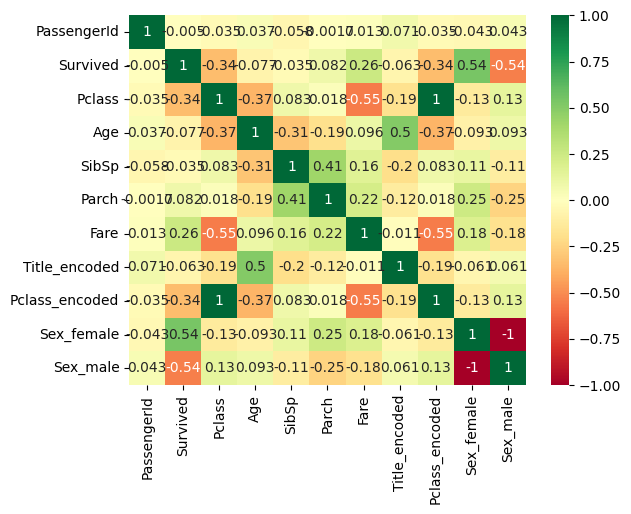

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_data = data.select_dtypes(include=['float64', 'int64'])

def titanic_corr(numerical_data):
    correlation = numerical_data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    plt.show()

titanic_corr(numerical_data)


**Soal 10**

In [ ]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

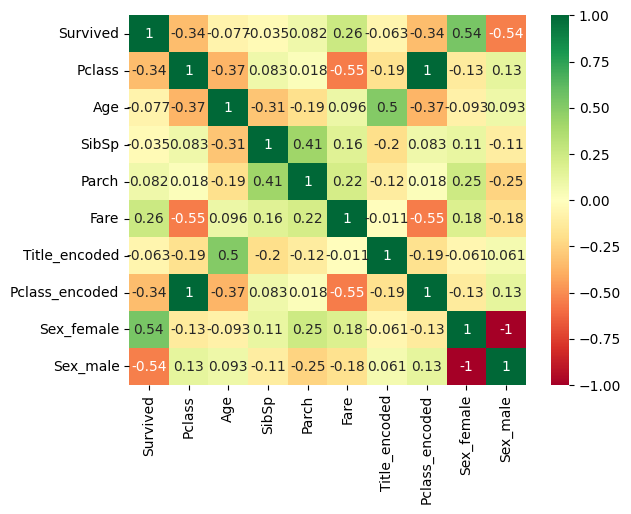

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_data = data.select_dtypes(include=['float64', 'int64'])

def titanic_corr(numerical_data):
    correlation = numerical_data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    plt.show()

titanic_corr(numerical_data)

In [ ]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2
Title,2
PassengerType,0
Title_encoded,2
